In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
#loading the dataset
california = fetch_california_housing()
print(california.data)
print(california.target)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


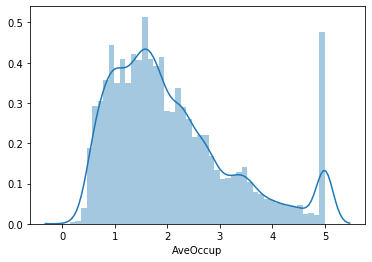

In [12]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df.to_csv(r'E:\\5502\\california.csv')
california_df['AveOccup'] = california.target
sns.distplot(california_df['AveOccup'])
plt.show()

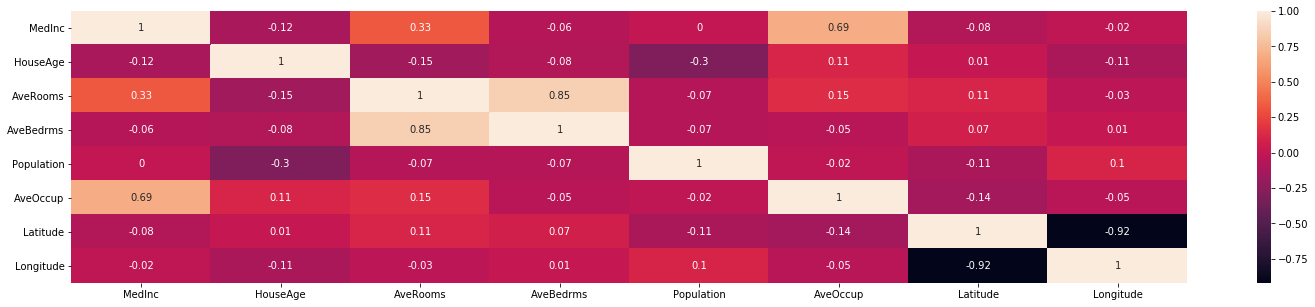

In [13]:
#Correlation matrix
correlation_mat = california_df.corr().round(2)
plt.figure(figsize=(25, 5))
sns.heatmap(data=correlation_mat, annot= True)
plt.show()


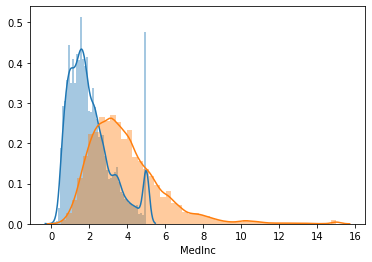

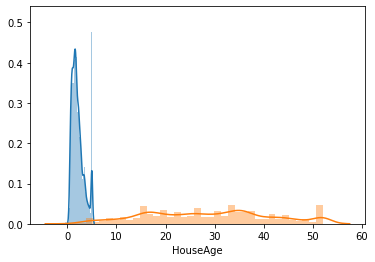

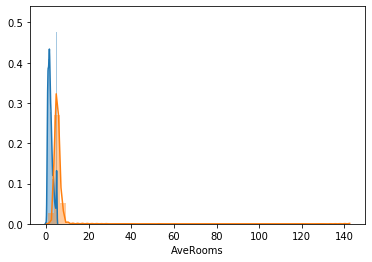

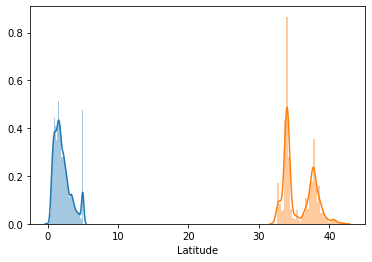

In [14]:
#Cleaning the data
column_item = []
index_items = []
for item in california_df.columns:
  if abs(correlation_mat[item]['AveOccup']) < 0.1:
    column_item = column_item + [item]
  index_items = index_items + [item]
index_items.remove('AveOccup')
cleaned_california_df = california_df.drop(columns=column_item).dropna()
cleaned_corr_df = correlation_mat.drop(index_items).drop(columns=column_item + ['AveOccup']).dropna()
columns = list(cleaned_california_df.columns)
columns.remove('AveOccup')
cleaned_california_df.to_csv(r'E:\\5502\\cleaned_california.csv')

# Creates the histograms in relation with columns with correlation greater than 0.2 and AveOccup.
for col in columns:
    sns.distplot(cleaned_california_df['AveOccup'])
    sns.distplot(cleaned_california_df[col])
    plt.show()

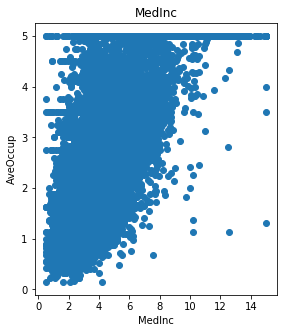

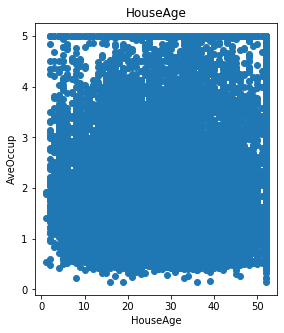

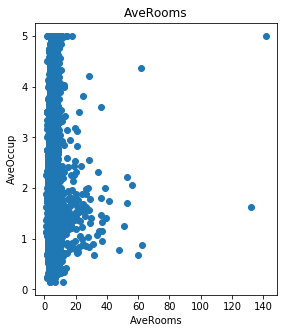

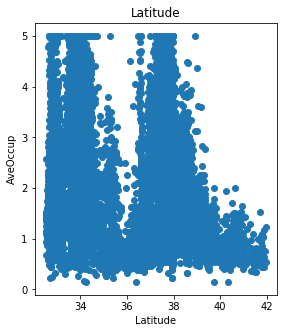

In [15]:
# Creates the scatterplots in relation with columns with correlation greater than 0.1 and AveRooms.
for iterator,col in enumerate(columns):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, len(columns), iterator + 1)
    column_x = cleaned_california_df[col]
    column_y = cleaned_california_df['AveOccup']
    plt.scatter(column_x,column_y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('AveOccup')
    plt.show()

In [16]:
#Get the main data for testing and training.
X_MAIN = cleaned_california_df.drop(['AveOccup'], axis =1)
Y_MAIN = cleaned_california_df.drop(columns, axis = 1)

Text(0, 0.5, 'Predictions')

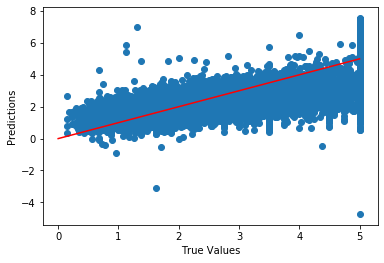

In [17]:
#Cross Validation.
linear_regression_model = LinearRegression()
cross_val = cross_val_score(linear_regression_model, X_MAIN, Y_MAIN, cv=5)
prediction = cross_val_predict(linear_regression_model, X_MAIN, Y_MAIN, cv = 5)
acc = r2_score(Y_MAIN, prediction)
mean_squared_error = np.sqrt(mean_squared_error(Y_MAIN,prediction))

x = np.linspace(0,5,100)
y = x
plt.plot(x,y,'-r')
plt.scatter(Y_MAIN, prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [18]:
#Training stats
print('MODEL STATS')
print('R2 score : ', acc)
print('Cross validated scores: ', cross_val)
print('Mean squared error: ', mean_squared_error)

MODEL STATS
R2 score :  0.4891261167635378
Cross validated scores:  [0.48974758 0.40862235 0.50319502 0.34860151 0.53196804]
Mean squared error:  0.8247752860794688
